<a href="https://colab.research.google.com/github/usamaeltmsah/HR-Bot-evaluation-model/blob/compare-model-answers-to-applicant-answer/Semantic_Similarity_with_TF_Hub_Universal_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
# Copyright 2018 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

# Universal Sentence Encoder


<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>


## This notebook illustrates how to access the Universal Sentence Encoder and use it for sentence similarity and sentence classification tasks.

The Universal Sentence Encoder makes getting sentence level embeddings as easy as it has historically been to lookup the embeddings for individual words. The sentence embeddings can then be trivially used to compute sentence level meaning similarity as well as to enable better performance on downstream classification tasks using less supervised training data.


# Getting Started

This section sets up the environment for access to the Universal Sentence Encoder on TF Hub and provides examples of applying the encoder to words, sentences, and paragraphs.

In [31]:
%%capture
# Install the latest Tensorflow version.sentence
!pip3 install --upgrade tensorflow-gpu
# Install TF-Hub.
!pip3 install tensorflow-hub
!pip3 install seaborn

More detailed information about installing Tensorflow can be found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/).

In [32]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  # #It is important to use this placeholder, this allows you to keep the graph static, else you will run into memory leaks
  # input = tf.placeholder(dtype=tf.string, shape=[None])
  return model(input)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


module https://tfhub.dev/google/universal-sentence-encoder-large/5 loaded


# Data Cleaning

## Remove punctuations

In [33]:
def rem_punc_from_answers(answers):
  import re
  return [re.sub(r'[^\w\s]','',ans) for ans in answers]

In [3]:
# def rem_punc_from_text(text):
#   return re.sub(r'[^\w\s]','',text)

### Convert to lower case

In [16]:
def tolower_answers(answers):
  import string
  return [ans.lower() for ans in answers]

## Removing Stop Words

In [24]:
# def rem_stop_words(answers):
  # import nltk
  # nltk.download("stopwords")
  # from nltk.corpus import stopwords
  # stop = stopwords.words('english')
  # return [" ".join(ans for ans in ans.split() if ans not in stop) for ans in answers]


In [4]:
# def rem_stop_words_from_text(text):
#   return " ".join(text for text in text.split() if text not in stop)

## Clean All

In [34]:
def clean_data(answers):
  answers = rem_punc_from_answers(answers)
  return tolower_answers(answers)

In [ ]:
# def count_words(sentence):
#   return len(re.findall(r'\w+', sentence))

In [ ]:
# def compare_strings_lengths(s1, s2):
#   return count_words(s1) - count_words(s2)

In [ ]:
# # Return the index of the larger (according two n words) sentence
# # If s1 > s2 Return 0 Else return 1
# def which_larger(s1, s2):
#   return 0 if count_words(s1) > count_words(s2) else 1

# Text Embedding

In [35]:
def embed(input):
  return model(input)

# Semantic Textual Similarity Task Example

The embeddings produced by the Universal Sentence Encoder are approximately normalized. The semantic similarity of two sentences can be trivially computed as the inner product of the encodings.

In [36]:
def plot_similarity(labels, features, rotation):
  n = len(features)
  corr = np.inner(features, features[n - 1])
  sns.set(font_scale=1.2)
  df = pd.DataFrame({"features": corr},
                  index=labels)

  sns.heatmap(df, annot=True, fmt="g", cmap='viridis')

  plt.show()


  # g = sns.heatmap(
  #     corr,
  #     xticklabels=labels,
  #     yticklabels=labels,
  #     vmin=0,
  #     vmax=1,
  #     cmap="YlOrRd")
  # g.set_xticklabels(labels, rotation=rotation)
  # g.set_title("Semantic Textual Similarity")

In [49]:
def run_and_plot(sentences_):
  sentence_embeddings_ = embed(sentences_)
  plot_similarity(sentences_, sentence_embeddings_, 90)

In [38]:
# Correlation array
def calc_corr(features):
  n = len(features)
  corr = np.inner(features, features[-1])
  return corr

In [39]:
def sentence_embedding(sentences_):
  sentence_embeddings_ = embed(sentences_)
  return sentence_embeddings_

In [51]:
def evaluate_answer(answers, applicant_answer):
  answers.append(applicant_answer)

  sentence_embeddings_ = sentence_embedding(answers)
  del answers[-1]
  run_and_plot(answers)

  corr = calc_corr(sentence_embeddings_)
  return get_best_score(corr)

In [41]:
# @Param corr: the similarity matrix between all the texts
# @ Return max(applicant_answer_corr): the maximum score (Most related answer) 0.0 -> 1.0
# The last is the applicant answer
def get_best_score(corr):
  length = len(corr)
  
  applicant_answer_corr = corr
  # We don't need to compare the applicant answer to itself.
  applicant_answer_corr = np.delete(applicant_answer_corr, -1)
  return max(applicant_answer_corr)

## Similarity Visualized
Here we show the similarity in a heat map. The final graph is a 9x9 matrix where each entry `[i, j]` is colored based on the inner product of the encodings for sentence `i` and `j`.

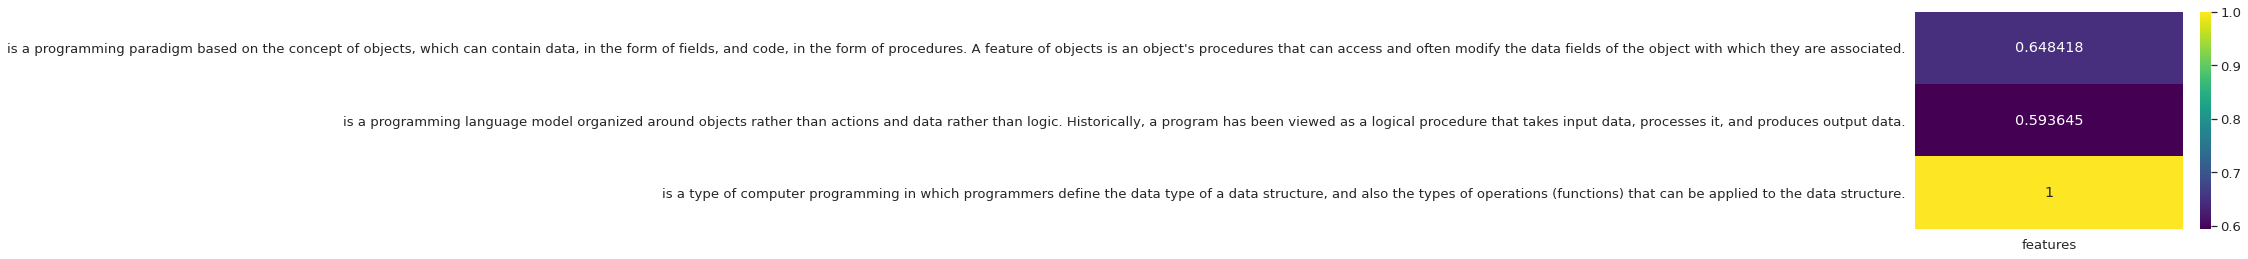

In [ ]:
questions = ["What is a Primary key", "What is a Unique key", "What is a Foreign key", "What do you mean by data integrity", "?What is the difference between clustered and non clustered index in SQL", "What do you mean by Denormalization", "What is an Index", "What do you mean by 'Trigger' in SQL", "What is the difference between cross join and natural join", "What is the need of MERGE statement"]
answers = [["The PRIMARY KEY constraint uniquely identifies each record in a table", "Primary keys must contain UNIQUE values, and cannot contain NULL values", "A table can have only ONE primary key; and in the table, this primary key can consist of single or multiple columns (fields)"], ["A unique key is a set of one or more than one fields/columns of a table that uniquely identify a record in a database table", "You can say that it is little like primary key but it can accept only one null value and it cannot have duplicate values", "The unique key and primary key both provide a guarantee for uniqueness for a column or a set of columns", "There is an automatically defined unique key constraint within a primary key constraint", "There may be many unique key constraints for one table, but only one PRIMARY KEY constraint for one table"], ["A FOREIGN KEY is a key used to link two tables together", "A FOREIGN KEY is a field (or collection of fields) in one table that refers to the PRIMARY KEY in another table", "The table containing the foreign key is called the child table, and the table containing the candidate key is called the referenced or parent table"], ["Data Integrity defines the accuracy as well as the consistency of the data stored in a database. It also defines integrity constraints to enforce business rules on the data when it is entered into an application or a database"], ["Clustered index is used for easy retrieval of data from the database and its faster whereas reading from non clustered index is relatively slower", "Clustered index alters the way records are stored in a database as it sorts out rows by the column which is set to be clustered index whereas in a non clustered index, it does not alter the way it was stored but it creates a separate object within a table which points back to the original table rows after searching"], ["Denormalization refers to a technique which is used to access data from higher to lower forms of a database. It helps the database managers to increase the performance of the entire infrastructure as it introduces redundancy into a table. It adds the redundant data into a table by incorporating database queries that combine data from various tables into a single table"], ["An index refers to a performance tuning method of allowing faster retrieval of records from the table. An index creates an entry for each value and hence it will be faster to retrieve data"], ["Trigger in SQL is are a special type of stored procedures that are defined to execute automatically in place or after data modifications. It allows you to execute a batch of code when an insert, update or any other query is executed against a specific table"], ["The cross join produces the cross product or Cartesian product of two tables whereas the natural join is based on all the columns having the same name and data types in both the tables"], ["This statement allows conditional update or insertion of data into a table. It performs an UPDATE if a row exists, or an INSERT if the row does not exist"]]

q_a_dict = dict(zip(questions, answers))

sentences = [
    # what is oop?
    "is a programming paradigm based on the concept of objects, which can contain data, in the form of fields, and code, in the form of procedures. A feature of objects is an object's procedures that can access and often modify the data fields of the object with which they are associated.",
    "is a programming language model organized around objects rather than actions and data rather than logic. Historically, a program has been viewed as a logical procedure that takes input data, processes it, and produces output data.",
    "is a type of computer programming in which programmers define the data type of a data structure, and also the types of operations (functions) that can be applied to the data structure.",

    # What is function requirments?
    # "defines a function of a system or its component, where a function is described as a specification of behavior between outputs and inputs.",
    # "describe how a product must behave, what its features and functions.",
    # "are functional features and specifications expected by users from the proposed software product.",

    # # What is computer software?
    # "is a package which includes a software program, its documentation, and user guide on how to use the software.",
    # "is a collection of data or computer instructions that tell the computer how to work. This is in contrast to physical hardware, from which the system is built and actually performs the work.",
    # "is a set of instructions and its documentations that tells a computer what to do or how to perform a task. Software includes all different software programs on a computer, such as applications and the operating system.",

    # # What Is Agile Scrum?
    # "DescriptionScrum is an agile process framework for managing complex knowledge work, with an initial emphasis on software development, although it has been used in other fields and is slowly starting to be explored for other complex work, research and advanced technologies.",
    # "is a subset of Agile. It is a lightweight process framework for agile development, and the most widely-used one.",
]

run_and_plot(sentences)

## Evaluation: STS (Semantic Textual Similarity) Benchmark

The [**STS Benchmark**](http://ixa2.si.ehu.es/stswiki/index.php/STSbenchmark) provides an intristic evaluation of the degree to which similarity scores computed using sentence embeddings align with human judgements. The benchmark requires systems to return similarity scores for a diverse selection of sentence pairs. [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is then used to evaluate the quality of the machine similarity scores against human judgements.

### Evaluate Sentence Embeddings

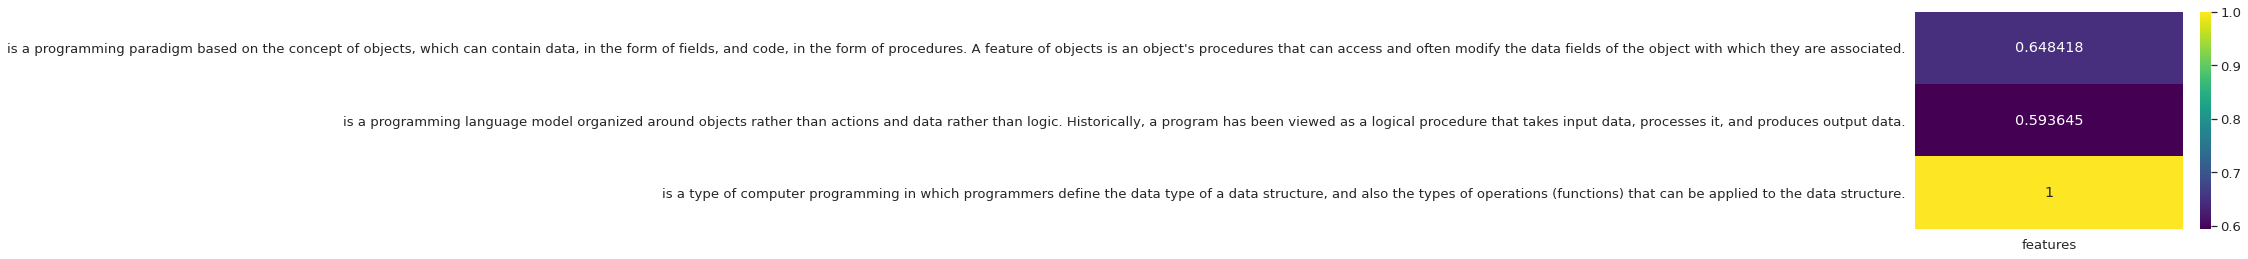

0.6484182


In [ ]:
model_answers = ["is a programming paradigm based on the concept of objects, which can contain data, in the form of fields, and code, in the form of procedures. A feature of objects is an object's procedures that can access and often modify the data fields of the object with which they are associated.",
    "is a programming language model organized around objects rather than actions and data rather than logic. Historically, a program has been viewed as a logical procedure that takes input data, processes it, and produces output data."]
applicant_answer = "is a type of computer programming in which programmers define the data type of a data structure, and also the types of operations (functions) that can be applied to the data structure."

print(evaluate_answer(model_answers, applicant_answer))

# Make N-grams

In [ ]:
def ngrams(text, n):
  # Import Library for ngrams
  from textblob import TextBlob
  nltk.download('punkt')
  
  ngrams_word_lists_to_list = []
  ngrams = TextBlob(text).ngrams(n)
  for ngram in ngrams:
    ngrams_word_lists_to_list.append(' '.join(word for word in ngram))
  return ngrams_word_lists_to_list

In [ ]:
def ngrams(text, n):
  ngrams_word_lists_to_list = []
  ngrams = TextBlob(text).ngrams(n)
  for ngram in ngrams:
    ngrams_word_lists_to_list.append(' '.join(word for word in ngram))
  return ngrams_word_lists_to_list

In [ ]:
_ngrams = ngrams("is a type of computer programming in which programmers define the data type of a data structure, and also the types of operations (functions) that can be applied to the data structure.", 5)

In [ ]:
def ngrams_to_embed_dict(ngrams):
  embeddings_dict = {}
  for ngram in _ngrams:
    embeddings_dict[ngram] = embed([ngram])

  return embeddings_dict

## Save N-grams

In [ ]:
def save_obj(obj, name='/content/drive/My Drive/Colab Notebooks/GP_Model_Semantic_Similarity_USE/ngrams_dict.sav'):
  import pickle
  pickle.dump(obj, open(name, 'wb'))

In [ ]:
def load_obj(name='/content/drive/My Drive/Colab Notebooks/GP_Model_Semantic_Similarity_USE/ngrams_dict.sav'):
  import pickle
  return pickle.load(open(name, 'rb'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
diction = ngrams_to_embed_dict(_ngrams)
save_obj(diction)

In [ ]:
dict = load_obj()
print(dict)

# Implement All

In [42]:
def main():
  model_answers = ["is a programming paradigm based on the concept of objects, which can contain data, in the form of fields, and code, in the form of procedures. A feature of objects is an object's procedures that can access and often modify the data fields of the object with which they are associated.",
    "is a programming language model organized around objects rather than actions and data rather than logic. Historically, a program has been viewed as a logical procedure that takes input data, processes it, and produces output data."]
  applicant_answer = "is a type of computer programming in which programmers define the data type of a data structure, and also the types of operations (functions) that can be applied to the data structure."
  # Clean data
  model_answers = clean_data(model_answers)
  applicant_answer = clean_data([applicant_answer])[0]
  print(evaluate_answer(model_answers, applicant_answer))

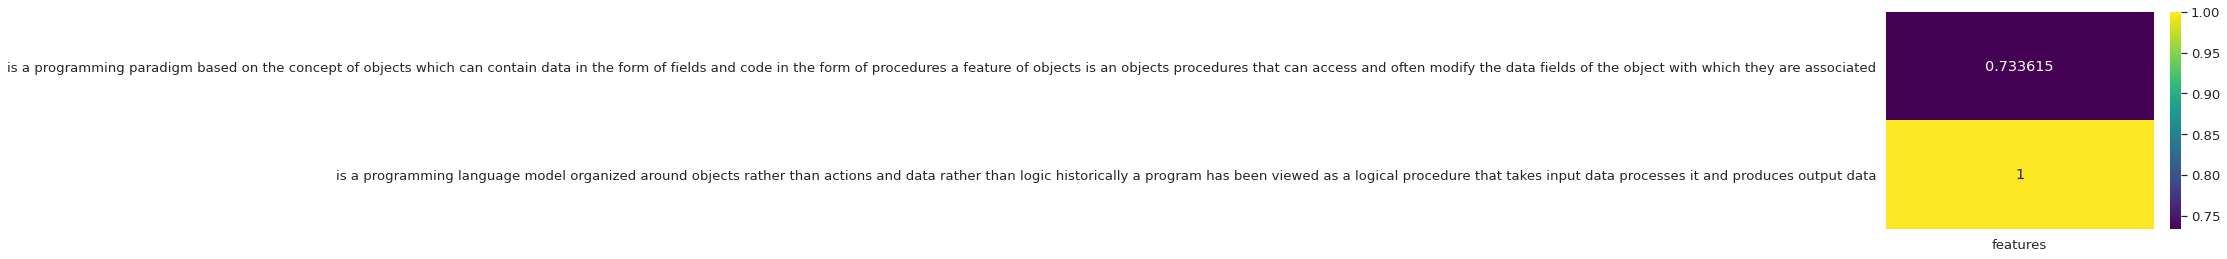

0.6484183


In [52]:
if __name__ == "__main__":
    main()

In [57]:
# TODO:
# - MAKE TEST CASES SO WE NEED TO GENERATE MANY TEXT DATA AND AS MODEL ANSWERS, AND ONE AS APPLICANT ANSWER
# - CALCULATE THE TIME FOR MODEL, 10 ANSWERS OF LENGTH N WORDS COMPARED TO AN ANSWER OF LENTH M, AND FOR 100 AND SO ON